In [1]:
pip install tensorflow scikit-learn pandas



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization


# Wczytaj dane i ogranicz rozmiar
train_df = pd.read_csv("train_data.csv").dropna(subset=["text"]).sample(200000, random_state=42)
test_df = pd.read_csv("test_data.csv").dropna(subset=["text"]).sample(20000, random_state=42)

# Dane wejściowe i wyjściowe
X_train_text = train_df['text'].values
y_train = train_df['sentiment'].values
X_test_text = test_df['text'].values
y_test = test_df['sentiment'].values

# TF-IDF
vectorizer = TfidfVectorizer(max_features=15000)
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

# Model Dense z sigmoid

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])



model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie
history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_split=0.1)

# Ocena
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Dokładność na zbiorze testowym:", accuracy)


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.6932 - loss: 0.5860 - val_accuracy: 0.7744 - val_loss: 0.4763
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7829 - loss: 0.4678 - val_accuracy: 0.7747 - val_loss: 0.4700
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7976 - loss: 0.4453 - val_accuracy: 0.7793 - val_loss: 0.4701
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.8132 - loss: 0.4227 - val_accuracy: 0.7788 - val_loss: 0.4724
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.8276 - loss: 0.4009 - val_accuracy: 0.7784 - val_loss: 0.4861
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7817 - loss: 0.4843
Dokładność na zbiorze testowym: 0.7818499803543091


In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.1)


Epoch 1/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8093 - loss: 0.4279 - val_accuracy: 0.7799 - val_loss: 0.4739
Epoch 2/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8131 - loss: 0.4243 - val_accuracy: 0.7800 - val_loss: 0.4759
Epoch 3/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8179 - loss: 0.4162 - val_accuracy: 0.7804 - val_loss: 0.4787
Epoch 4/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8215 - loss: 0.4101 - val_accuracy: 0.7803 - val_loss: 0.4800
Epoch 5/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.8270 - loss: 0.4020 - val_accuracy: 0.7798 - val_loss: 0.4833
Epoch 6/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8301 - loss: 0.3985 - val_accuracy: 0.7803 - val_loss: 0.4864
Epoch 7/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8331 - loss: 0.3919 - val_accuracy: 0.7806 - val_loss: 0.4908
Epoch 8/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.8396 - loss: 0.3833 - 

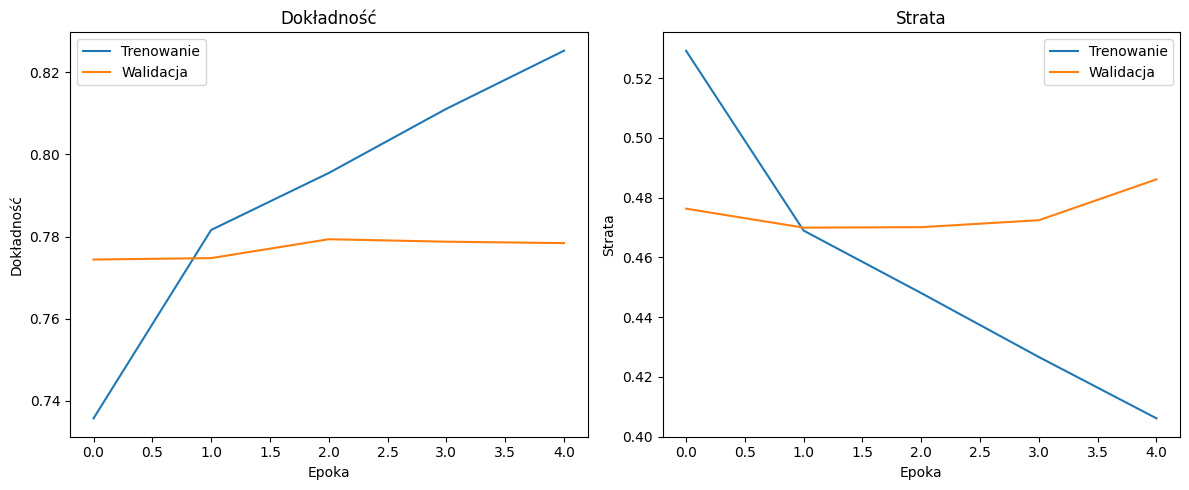

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Dokładność
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Trenowanie')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

# Strata
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Trenowanie')
plt.plot(history.history['val_loss'], label='Walidacja')
plt.title('Strata')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


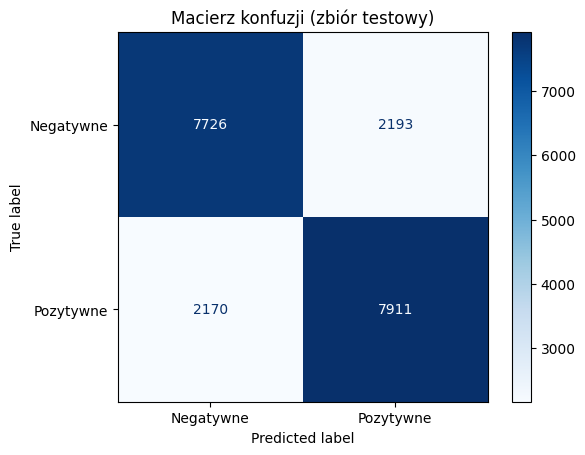

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Przewidywanie
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negatywne", "Pozytywne"])
disp.plot(cmap='Blues')
plt.title('Macierz konfuzji (zbiór testowy)')
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === Dane ===
train_df = pd.read_csv("train_data.csv").dropna(subset=["text"]).sample(200_000, random_state=42)
test_df = pd.read_csv("test_data.csv").dropna(subset=["text"]).sample(50_000, random_state=42)

X_train_text = train_df["text"].values
y_train = train_df["sentiment"].values
X_test_text = test_df["text"].values
y_test = test_df["sentiment"].values

# === Tokenizacja ===
max_words = 30000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# === Model ===
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# === Trening ===
model.fit(X_train_pad, y_train, epochs=5, batch_size=512, validation_split=0.1)

# === Ocena ===
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print("Dokładność na zbiorze testowym:", accuracy)


Epoch 1/5


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


352/352 ━━━━━━━━━━━━━━━━━━━━ 57s 160ms/step - accuracy: 0.6805 - loss: 0.5779 - val_accuracy: 0.7780 - val_loss: 0.4670
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 67s 191ms/step - accuracy: 0.8007 - loss: 0.4351 - val_accuracy: 0.7769 - val_loss: 0.4712
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 109s 310ms/step - accuracy: 0.8232 - loss: 0.3879 - val_accuracy: 0.7747 - val_loss: 0.4950
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 92s 262ms/step - accuracy: 0.8417 - loss: 0.3458 - val_accuracy: 0.7668 - val_loss: 0.5522
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 86s 244ms/step - accuracy: 0.8579 - loss: 0.3095 - val_accuracy: 0.7618 - val_loss: 0.6141
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7658 - loss: 0.5938
Dokładność na zbiorze testowym: 0.7643799781799316
